# Flu shot acceptance: learning from a previous pandemic

This is the capstone project of the neue fische Data Science Bootcamp. It was a collaborative effort between [Christina Rudolf](https://github.com/christinarudolf), [Raymond Boateng](https://github.com/RayKwame) and [Juliane Berek](https://github.com/julianeberek).

## Introduction

The H1N1 influenza pandemic (also known as swine influenza) was caused by H1N1 influenza virus and affected the world between June 2009 to August 2010 (according to WHO declaration). It was the most recent pandemic prior to COVID19. An estimated 11 - 21% of the global population was affected, with deaths in the U.S. totalling 12,469.

This project aimed to:
- Help to increase vaccination rates for seasonal and pandemic flu in the overall population (this reducing the burden of influenza by decreasing hospitalisations/ deaths)
- Identify factors that determine the chance of getting vaccinated
- Identify groups with lower likelihood for getting vaccinated, in order to target them with promotions
- Determine differences of seasonal vs. H1N1 (pandemic) vaccinations

## Description of dataset

The original data was collected through the National 2009 H1N1 Flu Survey in the U.S. between 2009 - 2010. The current dataset formed part of the DrivenData Challenge ["Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines"](https://www.drivendata.org/competitions/66/flu-shot-learning/).

The dataset consists of approximately 27 000 participant responses. The main outcome variables in the dataset:
- whether the participant received the vaccination against the H1N1 flu
- whether the participant received the vaccination against the seasonal flu

The remainder of the dataset consists of [35 categorical variables](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/), broadly falling into participant demographics, attitudes and knowledge about H1N1 and seasonal flu and vaccination, and healthcare information.

## Hypotheses

We had two main hypotheses we intended to address in our project:

- Some features affect the likelihood of vaccination more than others, e.g. attitudes and knowledge, recommendations by doctors
- H1N1 vaccination is taken more due to the pandemic context 

## Notebook description

![](https://raw.githubusercontent.com/RayKwame/TheFluShot/main/images/Model_creation.JPG?token=ATDLUYNGNEFYDG52Z7FUCSDBCFXSK)

This notebook describes the steps taken to create the final prediction model (based on the Random Forest Classifier) for predicting vaccination against the flu. Two models are developed--the first for prediction of H1N1 flu vaccination, the second for prediction of seasonal flu vaccination. It also describes the identification and exploration of the important features for vaccination prediction.

It includes the following sections:

1. Import of necessary packages and libraries
2. Import and examination of data
3. EDA
4. Feature engineering
5. Data cleaning
6. Prediction of H1N1 flu vaccination  
    6.1 Separation of data into features and target variable  
    6.2 Performing test-train split  
    6.3 Data balancing by downsampling the majority class  
    6.4 Modelling and prediction  
    6.5 Evaluation of model performance  
    6.6 Hyperparameter tuning and final evaluation of model performance  
    6.7 Error evaluation of model  
7. Prediction of seasonal flu vaccination  
    7.1 Separation of data into features and target variable  
    7.2 Performing test-train split  
    7.3 Modelling and prediction  
    7.4 Evaluation of model performance  
    7.5 Hyperparameter tuning and final evaluation of model performance  
    7.6 Error evaluation of model  
8. Summary and conclusions

## 1. Import of necessary packages and libraries

In [1]:
import sys
# adding to the path variables the one folder higher (locally, not changing system variables)
sys.path.append("..")
import pandas as pd
import numpy as np
import warnings
import mlflow
#from modeling.config import TRACKING_URI, EXPERIMENT_NAME

RSEED = 42
# Modeling Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

# for resampling (data balancing)
from sklearn.utils import resample

# for feature importance
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

warnings.filterwarnings('ignore')

## 2. Import and examination of data

The description of the data, from [DrivenData](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/):

For all binary variables: 0 = No; 1 = Yes.

    h1n1_concern - Level of concern about the H1N1 flu.  
        0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.  
    h1n1_knowledge - Level of knowledge about H1N1 flu.  
        0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.  
    behavioral_antiviral_meds - Has taken antiviral medications. (binary)  
    behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)  
    behavioral_face_mask - Has bought a face mask. (binary)  
    behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)  
    behavioral_large_gatherings - Has reduced time at large gatherings. (binary)  
    behavioral_outside_home - Has reduced contact with people outside of own household. (binary)  
    behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)  
    doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)  
    doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)  
    chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)  
    child_under_6_months - Has regular close contact with a child under the age of six months. (binary)  
    health_worker - Is a healthcare worker. (binary)  
    health_insurance - Has health insurance. (binary)  
    opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.  
        1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.  
    opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.  
        1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.  
    opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.  
        1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.  
    opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.  
        1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.  
    opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.  
        1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.  
    opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.  
        1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.  
    age_group - Age group of respondent.  
    education - Self-reported education level.  
    race - Race of respondent.  
    sex - Sex of respondent.  
    income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.  
    marital_status - Marital status of respondent.  
    rent_or_own - Housing situation of respondent.  
    employment_status - Employment status of respondent.  
    hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.  
    census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.  
    household_adults - Number of other adults in household, top-coded to 3.  
    household_children - Number of children in household, top-coded to 3.  
    employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.  
    employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.  

Data was imported and saved to a dataframe:

In [2]:
df = pd.read_csv('data/Flu_Shot_Data_cleaned_2.csv')

# Getting rid of erroneous column 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)

Examination of data:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_vaccine                 26707 non-null  int64  
 1   seasonal_vaccine             26707 non-null  int64  
 2   h1n1_concern                 26615 non-null  float64
 3   h1n1_knowledge               26591 non-null  float64
 4   behavioral_antiviral_meds    26636 non-null  float64
 5   behavioral_avoidance         26499 non-null  float64
 6   behavioral_face_mask         26688 non-null  float64
 7   behavioral_wash_hands        26665 non-null  float64
 8   behavioral_large_gatherings  26620 non-null  float64
 9   behavioral_outside_home      26625 non-null  float64
 10  behavioral_touch_face        26579 non-null  float64
 11  doctor_recc_h1n1             24547 non-null  float64
 12  doctor_recc_seasonal         24547 non-null  float64
 13  chronic_med_cond

- Our target variables are h1n1_vaccine and seasonal_vaccine
- We are working with 35 feature variables--all categorical
- Twelve of the feature variables are strings--these will be encoded numerically for the Random Forest Classifier, as part of data cleaning

Missing values were checked:

In [4]:
df.isnull().sum(axis = 0)

h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
i

Five of the features were complete, but others had a considerable amount of missing data (up to 50%, e.g. employment_occupation).

The Random Forest Classifier is able to work with missing data, but the NaN values first need to be [filled with dummy values (such as -999) prior](https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/). This will be done as part of data cleaning.

## 3. EDA

The distribution of the two target variables between the negative and positive class were examined:

In [5]:
perc_h1n1_pos = (df.h1n1_vaccine.value_counts() / df.h1n1_vaccine.count())[0] * 100
perc_h1n1_neg = (df.h1n1_vaccine.value_counts() / df.h1n1_vaccine.count())[1] * 100
perc_seas_pos = (df.seasonal_vaccine.value_counts() / df.seasonal_vaccine.count())[0] * 100
perc_seas_neg = (df.seasonal_vaccine.value_counts() / df.seasonal_vaccine.count())[1] * 100

print("Percent vaccinated against H1N1 flu: {:.2f}%".format(perc_h1n1_pos))
print("Percent not vaccinated against H1N1 flu: {:.2f}%".format(perc_h1n1_neg))

print("Percent vaccinated against seasonal flu: {:.2f}%".format(perc_seas_pos))
print("Percent not vaccinated against seasonal flu: {:.2f}%".format(perc_seas_neg))

Percent vaccinated against H1N1 flu: 78.75%
Percent not vaccinated against H1N1 flu: 21.25%
Percent vaccinated against seasonal flu: 53.44%
Percent not vaccinated against seasonal flu: 46.56%


The H1N1 flu vaccination was taken up less than the seasonal flu vaccination (thus disproving our second hypothesis). 53% of participants took the seasonal flu vaccine, while only 21% took the H1N1 flu vaccine.

For the seasonal flu vaccine, the distribution between the positive and negative classes was fairly even.

For the H1N1 flu vaccine, the distribution between positive and negative classes was not even--the majority class was 0 (i.e. participants who didn' take the vaccine).

Next, we looked at the correlation between variables in order to identify multicollinear features. As many prediction models assume independence between predictive features, such features would need to be modified to eliminate this multicollinearity:

In [6]:
s = df.corr(method='spearman').unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates()
print(s[1:10])

doctor_recc_seasonal         doctor_recc_h1n1               0.591868
behavioral_outside_home      behavioral_large_gatherings    0.584085
opinion_seas_risk            opinion_h1n1_risk              0.564522
opinion_h1n1_sick_from_vacc  opinion_seas_sick_from_vacc    0.502192
opinion_h1n1_vacc_effective  opinion_seas_vacc_effective    0.444043
seasonal_vaccine             opinion_seas_vacc_effective    0.397874
h1n1_vaccine                 doctor_recc_h1n1               0.393890
seasonal_vaccine             opinion_seas_risk              0.389286
h1n1_concern                 opinion_h1n1_risk              0.386032
dtype: float64


Four combinations of features had a Spearman correlation of over 0.5, which was considered to be "highly correlated":
- doctor_recc_seasonal, doctor_recc_h1n1
- behavioral_outside_home, behavioral_large_gatherings
- opinion_seas_risk, opinion_h1n1_risk
- opinion_h1n1_sick_from_vacc, opinion_seas_sick_from_vacc

This will be addressed as part of feature engineering.

## 4. Feature engineering

The multicollinear features were addressed using one of the following two strategies:
- Binary features will be combined into categories (4 combinations)
- Non-binary features will be dropped according to the target variable


1. Creation of a new column based on doctor's reccomendation of vaccine

This combined the columns doctor_recc_seasonal and doctor_recc_h1n1, based on whether both, neither, or only one of the vaccines have been recommended:

In [7]:
# set up of function to combine columns

def get_reco(row):
    # none of the vaccines has been recommended
    if row['doctor_recc_seasonal'] == 0 and row['doctor_recc_h1n1'] == 0:
        val = 0
    # both vaccines have been recommended
    elif row['doctor_recc_seasonal'] == 0 and row['doctor_recc_h1n1'] == 1:
        val = 1
    # only seasonal vaccine has been recommended 
    elif row['doctor_recc_seasonal'] == 1 and row['doctor_recc_h1n1'] == 0:
        val = 2
    # only H1N1 vaccine has been recommended
    elif row['doctor_recc_seasonal'] == 1 and row['doctor_recc_h1n1'] == 1:
        val = 3
    else:
        val = None
    return val

# applying the function
# values will be converted to categorical

df['reco_vaccines'] = df.apply(get_reco, axis=1).astype('category')

# removal of old columns

removal = ['doctor_recc_seasonal', 'doctor_recc_h1n1']

df.drop(removal, axis=1, inplace=True)

# checking distribution of values between new categories

df['reco_vaccines'].value_counts()

0.0    15659
3.0     4614
2.0     3480
1.0      794
Name: reco_vaccines, dtype: int64

2. Creation of a new column based on behaviour at large gatherings and behaviour outside of home

This combined the columns behavioral_large_gatherings and behavioral_outside_home. Note: we need to make an assumption that '0' refers to not having done it and '1' refers to having done it

In [8]:
# set up of function to combine columns

def get_behaviour(row):
    # none of the behaviours applies 
    if row['behavioral_large_gatherings'] == 0 and row['behavioral_outside_home'] == 0:
        val = 0
    # both behaviours apply 
    elif row['behavioral_large_gatherings'] == 0 and row['behavioral_outside_home'] == 1:
        val = 1
    # only reducing time at large gatherings applies 
    elif row['behavioral_large_gatherings'] == 1 and row['behavioral_outside_home'] == 0:
        val = 2
    # only reduced contact with people outside of household applies 
    elif row['behavioral_large_gatherings'] == 1 and row['behavioral_outside_home'] == 1:
        val = 3
    else:
        val = None
    return val

# applying the function
# values will be converted to categorical

df['behaviour_gather_home'] = df.apply(get_behaviour, axis=1).astype('category')

# removal of old columns

removal = ['behavioral_large_gatherings', 'behavioral_outside_home']

df.drop(removal, axis=1, inplace=True)

# checking distribution of values between new categories

df.behaviour_gather_home.value_counts()

0.0    14808
3.0     6723
2.0     2796
1.0     2224
Name: behaviour_gather_home, dtype: int64

3. Removal of feature depending on target variable

Two further feature combinations were found to be multicollinear:

- opinion_seas_risk, opinion_h1n1_risk
- opinion_h1n1_sick_from_vacc, opinion_seas_sick_from_vacc

Each pairing had one feature relevant to the H1N1 flu vaccine and one relevant to the seasonal flu vaccine. Therefore, one feature in each pair was dropped, according to what the target variable of the model was (i.e. for the model predicting H1N1 flu vaccination, the columns opinion_seas_risk and opinion_seas_sick_from_vacc were dropped; for the model predicting seasonal flu vaccination, the columns opinion_h1n1_risk and opinion_h1n1_sick_from_vacc were dropped).

This dropping of features was done after data cleaning.

## 5. Data cleaning

The features consisting of string data were converted to numerical data:

In [10]:
cleanup = {"age_group": {"18 - 34 Years": 1, "35 - 44 Years": 2, "45 - 54 Years": 3, "55 - 64 Years": 4,
                                  "65+ Years": 5},
            "education": {"< 12 Years": 1, "12 Years": 2, "Some College": 3, "College Graduate": 4},
            "race": {"White": 1, "Black": 2, "Hispanic": 3, "Other or Multiple": 4},
            "sex" : {"Female": 1, "Male": 2},
            "rent_or_own" : {"Own": 1, "Rent": 2},
            "hhs_geo_region" : {"lzgpxyit": 1, "fpwskwrf": 2, "qufhixun": 3, "bhuqouqj": 4, "oxchjgsf": 5, "kbazzjca": 6, "mlyzmhmf": 7, "atmpeygn": 8, "lrircsnp": 9, "dqpwygqj": 10},
            "census_msa" : {"MSA, Principle City": 1, "MSA, Not Principle  City": 2, "Non-MSA": 3},
            "income_poverty" : {"Below Poverty": 1, "<= $75,000, Above Poverty": 2, "> $75,000": 3},
            "employment_industry" : {"fcxhlnwr": 1, "wxleyezf": 2, "ldnlellj": 3, "pxcmvdjn": 4, "atmlpfrs": 5, "arjwrbjb": 6, "xicduogh": 7, "mfikgejo": 8, "vjjrobsf": 9,
                                    "rucpziij": 10, "xqicxuve": 11, "saaquncn": 12, "cfqqtusy": 13, "nduyfdeo": 14, "mcubkhph": 15, "wlfvacwt": 16, "dotnnunm": 17, "haxffmxo": 18, "msuufmds": 19, "phxvnwax": 20,
                                    "qnlwzans": 21},
           "employment_occupation" : {"xtkaffoo": 1, "mxkfnird": 2, "emcorrxb": 3, "cmhcxjea": 4, "xgwztkwe": 5, "hfxkjkmi": 6, "qxajmpny": 7, "xqwwgdyp": 8, "kldqjyjy": 9,
                                    "uqqtjvyb": 10, "tfqavkke": 11, "ukymxvdu": 12, "vlluhbov": 13, "oijqvulv": 14, "ccgxvspp": 15, "bxpfxfdn": 16, "haliazsg": 17, "rcertsgn": 18, "xzmlyyjv": 19, "dlvbwzss": 20,
                                    "hodpvpew": 21, "dcjcmpih": 22, "pvmttkik": 23},
           "marital_status" : {"Married": 1, "Not Married": 2},
           "employment_status" : {"Employed": 1, "Not in Labor Force": 2, "Unemployed": 3}
                                  }

In [11]:
df = df.replace(cleanup)

Checking that the conversion to numerical data was successful:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   h1n1_vaccine                 26707 non-null  int64   
 1   seasonal_vaccine             26707 non-null  int64   
 2   h1n1_concern                 26615 non-null  float64 
 3   h1n1_knowledge               26591 non-null  float64 
 4   behavioral_antiviral_meds    26636 non-null  float64 
 5   behavioral_avoidance         26499 non-null  float64 
 6   behavioral_face_mask         26688 non-null  float64 
 7   behavioral_wash_hands        26665 non-null  float64 
 8   behavioral_touch_face        26579 non-null  float64 
 9   chronic_med_condition        25736 non-null  float64 
 10  child_under_6_months         25887 non-null  float64 
 11  health_worker                25903 non-null  float64 
 12  health_insurance             14433 non-null  float64 
 13  o

Next, the missing NaN values were filled with dummy values (-999):

In [13]:
# extracting column names (needed for reconstituting the dataframe)
cols = df.columns

# sklearn SimpleImputer was instantiated with the dummy value
imp_const = SimpleImputer(strategy='constant', fill_value=-999)

# filling of NaN values
df = imp_const.fit_transform(df)

# reconstituting the dataframe (SimpleImputer outputs an array)
df = pd.DataFrame(df, columns=cols)

Looking at the resultant dataframe, we see that there is no non-null data remaining:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_vaccine                 26707 non-null  float64
 1   seasonal_vaccine             26707 non-null  float64
 2   h1n1_concern                 26707 non-null  float64
 3   h1n1_knowledge               26707 non-null  float64
 4   behavioral_antiviral_meds    26707 non-null  float64
 5   behavioral_avoidance         26707 non-null  float64
 6   behavioral_face_mask         26707 non-null  float64
 7   behavioral_wash_hands        26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   chronic_med_condition        26707 non-null  float64
 10  child_under_6_months         26707 non-null  float64
 11  health_worker                26707 non-null  float64
 12  health_insurance             26707 non-null  float64
 13  opinion_h1n1_vac

## 6. Prediction of H1N1 flu vaccination

### 6.1 Separation of data into features and target variable

A new dataframe was made for the features used in the H1N1 vaccine prediction:

In [15]:
# making a list of variables to be dropped. This includes the outcome variable, as well as the two multicollinear variables described in Section 4 (Feature Engineering) 
#that contribute to multicollinearity

removal = ['h1n1_vaccine', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

# dropping the described variables
X_h1n1 = df.drop(removal, axis=1)

The target variable is set up:

In [18]:
y_h1n1 = df['h1n1_vaccine']
#y_h1n1 = y_h1n1.to_numpy()

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
26702    0.0
26703    0.0
26704    0.0
26705    0.0
26706    0.0
Name: h1n1_vaccine, Length: 26707, dtype: float64

###  6.2 Performing test-train split

A test-train split was performed on the data, using a test ratio of 0.2 and performing stratification on the target variable:

In [20]:
X_h1n1_train, X_h1n1_test, y_h1n1_train, y_h1n1_test = train_test_split(X_h1n1, y_h1n1, stratify = y_h1n1, test_size=0.2, random_state=RSEED)

The shape of the resulting train and test datasets was examined:

In [21]:
print('X_h1n1_train shape:', X_h1n1_train.shape)
print('X_h1n1_test shape:', X_h1n1_test.shape)
print('y_h1n1_train:', y_h1n1_train.shape)
print('y_h1n1_test:', y_h1n1_test.shape)

X_h1n1_train shape: (21365, 32)
X_h1n1_test shape: (5342, 32)
y_h1n1_train: (21365,)
y_h1n1_test: (5342,)


### 6.3 Data balancing by downsampling the majority class

https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

Since the H1N1 target variable is unbalanced, [down/undersampling of the majority class](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18) (h1n1_vaccine == 0) was used prior to model creation, to bring the majority and minority class into balance.

First, the training data  (target variable and features) was concatenated back together and then separated into the minority and majority class:

In [22]:
# concatenating our train data back together

concat_train_df = pd.concat([X_h1n1_train, y_h1n1_train], axis = 1)

# separating into minority and majority classes

# majority class
no_h1n1_vacc = concat_train_df[concat_train_df.h1n1_vaccine==0]

# minority class
yes_h1n1_vacc = concat_train_df[concat_train_df.h1n1_vaccine==1]

Downsampling was performed:

In [23]:
# downsample minority class
no_h1n1_vacc_downsampled = resample(no_h1n1_vacc,
                                   replace = False,
                                   n_samples = len(yes_h1n1_vacc),
                                   random_state = RSEED)

In [24]:
# combine minority and downsampled majority

downsampled = pd.concat([no_h1n1_vacc_downsampled, yes_h1n1_vacc])

In [25]:
# checking new class counts
downsampled.h1n1_vaccine.value_counts()

0.0    4539
1.0    4539
Name: h1n1_vaccine, dtype: int64

In [26]:
# relabelling the downsampled data as train dataset

y_h1n1_downsamp_train = downsampled[['h1n1_vaccine']]

X_downsamp_train =downsampled.drop(['h1n1_vaccine'], axis = 1)

The target variable had to be made into a flattened array, in order for the downstream modelling and prediction to work:

In [27]:
y_h1n1_downsamp_train = y_h1n1_downsamp_train.to_numpy()
y_h1n1_downsamp_train = y_h1n1_downsamp_train.ravel()

In [28]:
y_h1n1_test = y_h1n1_test.to_numpy()

### 6.4 Modelling and prediction

The Random Forest Classifier (RFC) was instantiated:

In [32]:
rand_forst= RandomForestClassifier()

The RFC was then fitted on the downsampled training data:

In [33]:
h1n1_rand_forst_model = rand_forst.fit(X_downsamp_train, y_h1n1_downsamp_train)

Predictions were generated based on the training and the test data:

In [34]:
rand_forst_trainpreds = h1n1_rand_forst_model.predict(X_h1n1_train)
rand_forst_testpreds = h1n1_rand_forst_model.predict(X_h1n1_test)

### 6.5 Evaluation of model performance

The performance of the RFC was evaluated on the train and the test data. 

The [AUC score](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) was chosen as the primary evaluation metric of interest. This is because the ROC curve consideres both positive and negative classes and informs how well the model distinquishes between the two classes. Both outcomes are valuable because there is nor preference for either. We had no preference for optimising prediction for either the positive or negative class--rather, we are interested in overall model performance.

Performance of our model on the training data:

In [41]:
# Random Forest--Train data evaluation Metrics

h1n1_rand_forst_train_roc = roc_auc_score(y_h1n1_train, rand_forst_trainpreds)

print("Primary evaluation metric:\nAUC score, training data: {:.2f}\n".format(h1n1_rand_forst_train_roc))

Primary evaluation metric:
AUC score, training data: 0.93



Performance of our model on the test data:

In [42]:
# Random Forest--Test data evaluation Metrics

h1n1_rand_forst_test_roc = roc_auc_score(y_h1n1_test, rand_forst_testpreds)

print("Primary evaluation metric:\nAUC score, testing data: {:.2f}\n".format(h1n1_rand_forst_test_roc))

Primary evaluation metric:
AUC score, testing data: 0.80



The AUC score on the test data was 0.8, which corresponds to very good/excellent discrimination between those who got vaccinated and those who didn't.

The AUC is also considerably higher on the train data (0.93 vs 0.8) which suggests that the model is prone to overfitting.

## 6.6 Hyperparameter tuning and final evaluation of model performance

Hyperparameter tuning was performed in an attempt to optimise model performance. To that end, a parameter grid was set up in order to perform grid search:

In [43]:
param_grid_unilabel = {
    'n_estimators': np.linspace(10, 100, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    #'estimators__estimator__min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

The randomised search model was created. We defined roc_auc as our evaluation metric for the parameter search 

In [44]:
grid_rand_forst_unilabel = RandomizedSearchCV(h1n1_rand_forst_model, param_distributions=param_grid_unilabel, cv=5, scoring='roc_auc', verbose=50, n_jobs=-1, n_iter=100)

Grid search was fitted to our model:

In [45]:
rand_forst_unilabel = grid_rand_forst_unilabel.fit(X_downsamp_train, y_h1n1_downsamp_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 3/5; 1/100] START bootstrap=False, max_depth=14, max_features=0.6, max_leaf_nodes=19, n_estimators=33
[CV 3/5; 1/100] END bootstrap=False, max_depth=14, max_features=0.6, max_leaf_nodes=19, n_estimators=33;, score=0.882 total time=   0.5s
[CV 3/5; 3/100] START bootstrap=False, max_depth=12, max_features=0.8999999999999999, max_leaf_nodes=42, n_estimators=21
[CV 3/5; 3/100] END bootstrap=False, max_depth=12, max_features=0.8999999999999999, max_leaf_nodes=42, n_estimators=21;, score=0.882 total time=   0.6s
[CV 4/5; 4/100] START bootstrap=True, max_depth=16, max_features=0.7, max_leaf_nodes=30, n_estimators=56
[CV 4/5; 4/100] END bootstrap=True, max_depth=16, max_features=0.7, max_leaf_nodes=30, n_estimators=56;, score=0.892 total time=   0.7s
[CV 2/5; 7/100] START bootstrap=True, max_depth=4, max_features=0.8999999999999999, max_leaf_nodes=40, n_estimators=46
[CV 2/5; 7/100] END bootstrap=True, max_depth=4, max_features

The best score and best parameters from the model:

In [46]:
print('Best score:\n{:.2f}'.format(rand_forst_unilabel.best_score_))
print("Best parameters:\n{}".format(rand_forst_unilabel.best_params_))

Best score:
0.89
Best parameters:
{'n_estimators': 67, 'max_leaf_nodes': 41, 'max_features': 0.5, 'max_depth': 7, 'bootstrap': True}


The optimised model was created using the best parameters and predictions were made on the train and test dataset:

In [47]:
best_model_rand_forst_unilabel= RandomForestClassifier(n_estimators= 67, max_leaf_nodes=41, max_features=0.5, max_depth=7, bootstrap=True)

In [48]:
best_model_rand_forst_unilabel = best_model_rand_forst_unilabel.fit(X_downsamp_train, y_h1n1_downsamp_train)

In [50]:
best_model_h1n1_train = best_model_rand_forst_unilabel.predict(X_h1n1_train)

best_model_h1n1_test = best_model_rand_forst_unilabel.predict(X_h1n1_test)

The performance of the optimised model was assessed using our chosen primary evaluation metric (AUC score). Additionally, accuracy, F1 score, precision and recall were output as secondary assessment metrics:

In [52]:
# Hyperparameter-tuned Random Forest--Train data evaluation Metrics

h1n1_best_model_train_roc = roc_auc_score(y_h1n1_train, best_model_h1n1_train)
h1n1_best_model_train_acc = accuracy_score(y_h1n1_train, best_model_h1n1_train)
h1n1_best_model_train_f1 = f1_score(y_h1n1_train, best_model_h1n1_train)
h1n1_best_model_train_precision = precision_score(y_h1n1_train, best_model_h1n1_train)
h1n1_best_model_train_recall = recall_score(y_h1n1_train, best_model_h1n1_train)

print("Primary evaluation metric:\nAUC score, training data: {:.2f}\n".format(h1n1_best_model_train_roc))
print("Secondary evaluation metrics:\nAccuracy, training data: {:.2f}".format(h1n1_best_model_train_acc))
print("F1 score, training data: {:.2f}".format(h1n1_best_model_train_f1))
print("Precision, training data: {:.2f}".format(h1n1_best_model_train_precision))
print("Recall, training data: {:.2f}".format(h1n1_best_model_train_recall))

Primary evaluation metric:
AUC score, training data: 0.82

Secondary evaluation metrics:
Accuracy, training data: 0.82
F1 score, training data: 0.66
Precision, training data: 0.55
Recall, training data: 0.83


In [53]:
# Hyperparameter-tuned Random Forest--Test data evaluation Metrics

h1n1_best_model_test_roc = roc_auc_score(y_h1n1_test, best_model_h1n1_test)
h1n1_best_model_test_acc = accuracy_score(y_h1n1_test, best_model_h1n1_test)
h1n1_best_model_test_f1 = f1_score(y_h1n1_test, best_model_h1n1_test)
h1n1_best_model_test_precision = precision_score(y_h1n1_test, best_model_h1n1_test)
h1n1_best_model_test_recall = recall_score(y_h1n1_test, best_model_h1n1_test)

print("Primary evaluation metric:\nAUC score, testing data: {:.2f}\n".format(h1n1_best_model_test_roc))
print("Secondary evaluation metrics:\nAccuracy, testing data: {:.2f}".format(h1n1_best_model_test_acc))
print("F1 score, testing data: {:.2f}".format(h1n1_best_model_test_f1))
print("Precision, testing data: {:.2f}".format(h1n1_best_model_test_precision))
print("Recall, testing data: {:.2f}".format(h1n1_best_model_test_recall))

Primary evaluation metric:
AUC score, testing data: 0.81

Secondary evaluation metrics:
Accuracy, testing data: 0.81
F1 score, testing data: 0.64
Precision, testing data: 0.53
Recall, testing data: 0.81


Following hyperparameter tuning, the discrepancy in the AUC score between the train and test dataset reduced considerably, suggesting that overfitting was eliminated.

The AUC score of the test data underwent only a slight increase (from 0.8 to 0.81), suggesting that hyperparameter tuning has not made a considerable impact on model performance.

### 6.7 Error evaluation of model 

The errors in the final model were evaluated via a confusion matrix and ROC

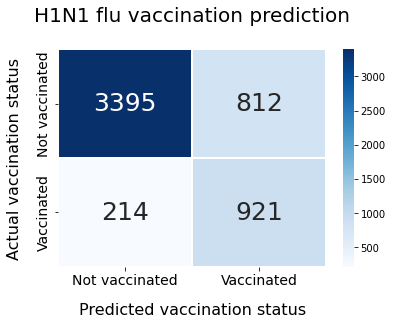

In [54]:
cm = confusion_matrix(y_h1n1_test, best_model_h1n1_test)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', linewidths=.5, annot_kws={"size":25})
plt.title("H1N1 flu vaccination prediction", fontsize=20, y=1.1)
plt.ylabel('Actual vaccination status', fontsize=16)
plt.xlabel('Predicted vaccination status', fontsize=16)
labels = ['Not vaccinated', 'Vaccinated']
ax = plt.gca()
ax.set_xticklabels(labels, fontsize=14)
ax.set_yticklabels(labels, va="center", fontsize=14)
ax.yaxis.labelpad = 15
ax.xaxis.labelpad = 15

The confusion matrix shows that the model appears to perform well in predicting the individuals who do not get vaccinated (negative class). In addition, the majority of people who did get vaccinated (positive class) were classified correctly. However, there was a considerable number of "false positives" (i.e. people who did not get vaccinated, but were predicted to do so).

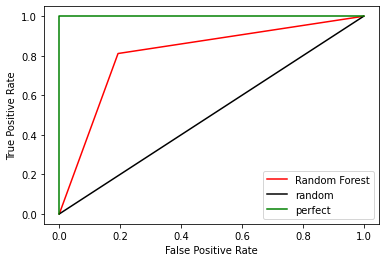

AUC Random Forest:0.809


In [55]:
fpr_rand_forst, tpr_rand_forst, thresholds_rand_forst = metrics.roc_curve(y_h1n1_test, best_model_h1n1_test)

plt.plot(fpr_rand_forst, tpr_rand_forst,'r-',label = 'Random Forest')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_rand_forst = roc_auc_score(y_h1n1_test, best_model_h1n1_test)
print('AUC Random Forest:%.3f'% auc_rand_forst)